In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv("credits.csv")


In [3]:
df2=pd.read_csv("movie_metadata.csv")

In [4]:
df2['title_year'].value_counts().sort_index()

1916.0      1
1920.0      1
1925.0      1
1927.0      1
1929.0      2
         ... 
2012.0    221
2013.0    237
2014.0    252
2015.0    226
2016.0    106
Name: title_year, Length: 91, dtype: int64

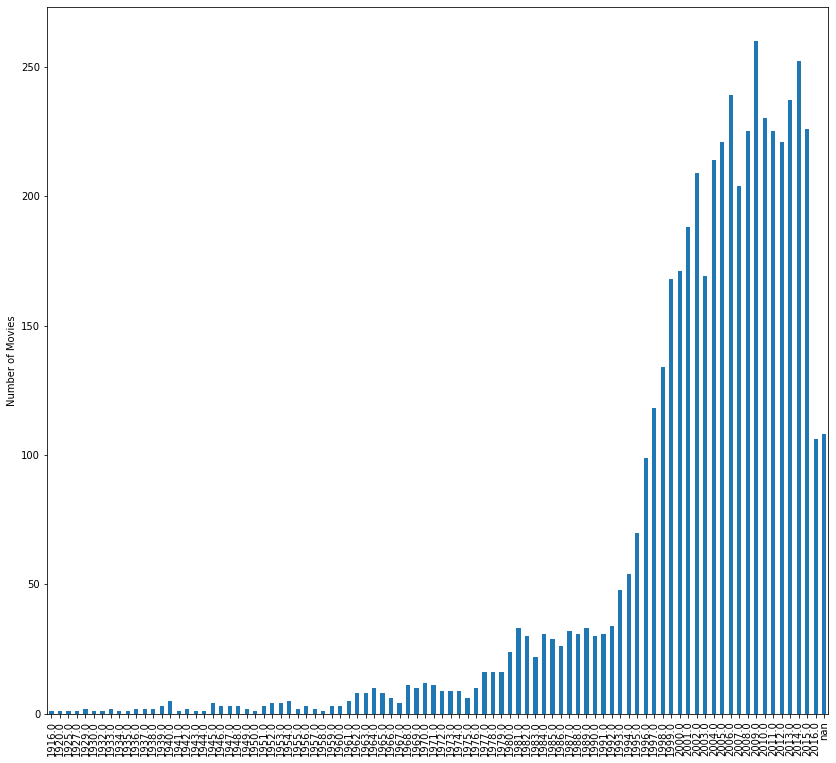

In [5]:
import matplotlib.pyplot as plt
df2.title_year.value_counts(dropna=False).sort_index().plot(kind='bar',figsize=(14,13))
plt.ylabel("Number of Movies")
plt.show()

In [6]:
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
df2.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [8]:
df2=df2[['director_name','actor_1_name','actor_2_name','actor_3_name','movie_title','genres']]

### Data Preprocessing

In [9]:
df2['genres']=df2['genres'].apply(lambda x: x.replace('|',' '))

In [10]:
df2['movie_title']=df2['movie_title'].apply(lambda x: x.lower())

In [11]:
df2.fillna('unknown',inplace=True)

In [12]:
df2['movie_title']=df2['movie_title'].apply(lambda x: x.replace('\xa0',''))

In [13]:
df2.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
movie_title      0
genres           0
dtype: int64

In [14]:
df2["combined"]=df2["actor_1_name"]+' '+df2["actor_2_name"]+' '+df2["actor_3_name"]+' '+df2["actor_3_name"]+' '+df2["director_name"]+' '+df2["genres"]+' '+df2["movie_title"]

In [15]:
df2.head(2)

,director_name,actor_1_name,actor_2_name,actor_3_name,movie_title,genres,combined
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,avatar,Action Adventure Fantasy Sci-Fi,CCH Pounder Joel David Moore Wes Studi Wes Stu...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,pirates of the caribbean: at world's end,Action Adventure Fantasy,Johnny Depp Orlando Bloom Jack Davenport Jack ...


In [16]:
df2.to_csv("2016.csv",index=False)